# Content

1. [Introduction](#Introduction)
2. [Data Acquisition](#Data-Acquisition)
3. [Data Exploration](#Data-Exploration)
4. [Data Visualization for Insights](#Data-Visualization-for-Insights)
    1. [Analysis of Continuous Features](#Analysis-of-Continuous-Features)
    2. [Analysis of Categorical Features](#Analysis-of-Categorical-Features)
    3. [Correlation Analysis](#Correlation-Analysis)
5. [Data Cleaning](#Data-Cleaning)
6. [Test Set](#Test-Set)
    1. [Random Method](#Train_test_split-method)
    2. [Stratified Method](#StratifiedShuffleSplit-method)
    3. [Method Comparison](#Method-Comparison)
7. [Model Training and Evaluation](#Model-Training-and-Evaluation)
    1. [Decision Tree](#DecisionTreeClassifier)
    2. [Random Forest](#RandomForestClassifier)
    3. [Support Vector Machine](#SVC)
    4. [K-nearest neighbors](#KNeighborsClassifier)
8. [Analysis and results](#Analysis-and-results)

# Introduction

The purpose of this document is to represent the predisposition of a patient to have a heart attack, based on an analysis of the Heart Attack Analysis & Prediction Dataset - NAMAN MANCHANDA.

This database provides a variety of clinical variables, collected from patients who have been evaluated for heart diseases. Through this information, the aim is to develop a machine learning model that helps identify patients at higher risk of experiencing a heart attack.

The dataset includes the following features:


* `age:` Patient's age. It is a numerical value representing the age in years.


* `sex:` Patient's gender. It is a categorical variable indicating the patient's gender. It is represented with the following values: 0 for female and 1 for male.


* `cp:` Chest pain type. It is a categorical variable describing the type of chest pain experienced by the patient. The possible values are as follows:

    0 = Typical angina: refers to chest pain related to reduced blood flow to the heart.

    1 = Atypical angina: refers to a type of chest pain that does not follow typical patterns of angina.

    2 = Non-anginal pain: indicates the presence of chest pain not related to heart problems.

    3 = Asymptomatic: means that the patient does not experience any type of chest pain.


* `trtbps:` Resting blood pressure. It is a numerical value representing the blood pressure in millimeters of mercury (mm Hg) at rest.


* `chol:` Cholesterol. It is a numerical value indicating the cholesterol level measured in milligrams per deciliter (mg/dl) obtained through a body mass index (BMI) sensor.


* `fbs:` Fasting blood sugar level. It is a categorical variable indicating whether the patient's fasting blood sugar level is above 120 mg/dl. The possible values are as follows:
   
   1 = True (fasting blood sugar level is above 120 mg/dl).
   
   0 = False (fasting blood sugar level is equal to or below 120 mg/dl).


* `restecg:` Resting electrocardiogram results. It is a categorical variable describing the results of the electrocardiogram performed on the patient at rest. The possible values are as follows:

    0 = Normal: indicates that the electrocardiogram results are normal.

    1 = ST-T wave abnormality: indicates the presence of abnormalities in the ST-T wave of the resting electrocardiogram.

    2 = Left ventricular hypertrophy: refers to the enlargement of the left ventricle of the heart, which can be indicative of heart problems.



* `thalachh:` Maximum heart rate achieved. It is a numerical value representing the maximum heart rate achieved by the patient.


* `oldpeak:` ST segment depression induced by exercise relative to rest. It is a numerical value indicating the decrease in the ST segment of the electrocardiogram induced by exercise compared to the previous resting state.


* `slp:` Slope of the peak exercise ST segment. It is a categorical variable describing the slope of the ST segment during peak exercise. The possible values are as follows:

    0 = Upsloping: indicates an upsloping ST segment during peak exercise.

    1 = Flat: indicates a flat ST segment during peak exercise.

    2 = Downsloping: indicates a downsloping ST segment during peak exercise.


* `caa:` Number of major vessels. It is a numerical value indicating the number of major vessels colored by fluoroscopy during an angiography. It can range from 0 to 3.

* `thall:` Thallium stress test result. It is a categorical variable describing the result

 of a thallium stress test used as a contrast agent. The possible values are as follows:

    0: Missing value.

    1: Normal result.

    2: Fixed defect.

    3: Reversible defect.


* `exng:` Exercise-induced angina. It is a categorical variable indicating whether the patient experiences exercise-induced angina (chest pain). The possible values are as follows:

    1 = Yes (the patient experiences exercise-induced angina).

    0 = No (the patient does not experience exercise-induced angina).


* `output:` Target variable. It is a categorical variable indicating whether the patient is prone to have a heart attack.

    1 = Yes (the patient is prone to have a heart attack).

    0 = No (the patient is not prone to have a heart attack).

# Data Acquisition

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


To obtain the database, we used the Kaggle platform's application page to download the data.

In [2]:
data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration

Great! Let's familiarize ourselves with the data by obtaining some information and examining the different variables.

In [3]:
print("The size of the database is: ", data.shape)

The size of the database is:  (303, 14)


In [4]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


With this information, we can see that the database does not contain any missing or nonexistent NaN values, which is helpful for data preparation and cleaning. On the other hand, we can observe that this database only contains numerical information. This simplifies the preprocessing and data cleaning process.

# Data Visualization for Insights

We will use the **Seaborn** and **Matplotlib** libraries for data visualization.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

data_viz = data.copy()

data_viz['output'] = data_viz['output'].map({0: 'Not predisposed', 1: 'Predisposed'})
data_viz['sex'] = data_viz['sex'].map({0: 'Woman', 1: 'Man'})
data_viz['exng'] = data_viz['exng'].map({0: 'No chest pain', 1: 'Chest pain'})
data_viz['fbs'] = data_viz['fbs'].map({0: '<= 120 mg/dl', 1: '> 120 mg/dl'})
data_viz['restecg'] = data_viz['restecg'].map({0: 'Normal', 1: 'Abnormal', 2: 'Hypertrophy'})
data_viz['slp'] = data_viz['slp'].map({0: 'Ascending', 1: 'Flat', 2: 'Descending'})
data_viz['thall'] = data_viz['thall'].map({0: 'Missing', 1: 'Normal', 2: 'Fixed', 3: 'Reversible'})

## Analysis of Continuous Features

Let's analyze the histograms of each of the continuous parameters in the database.

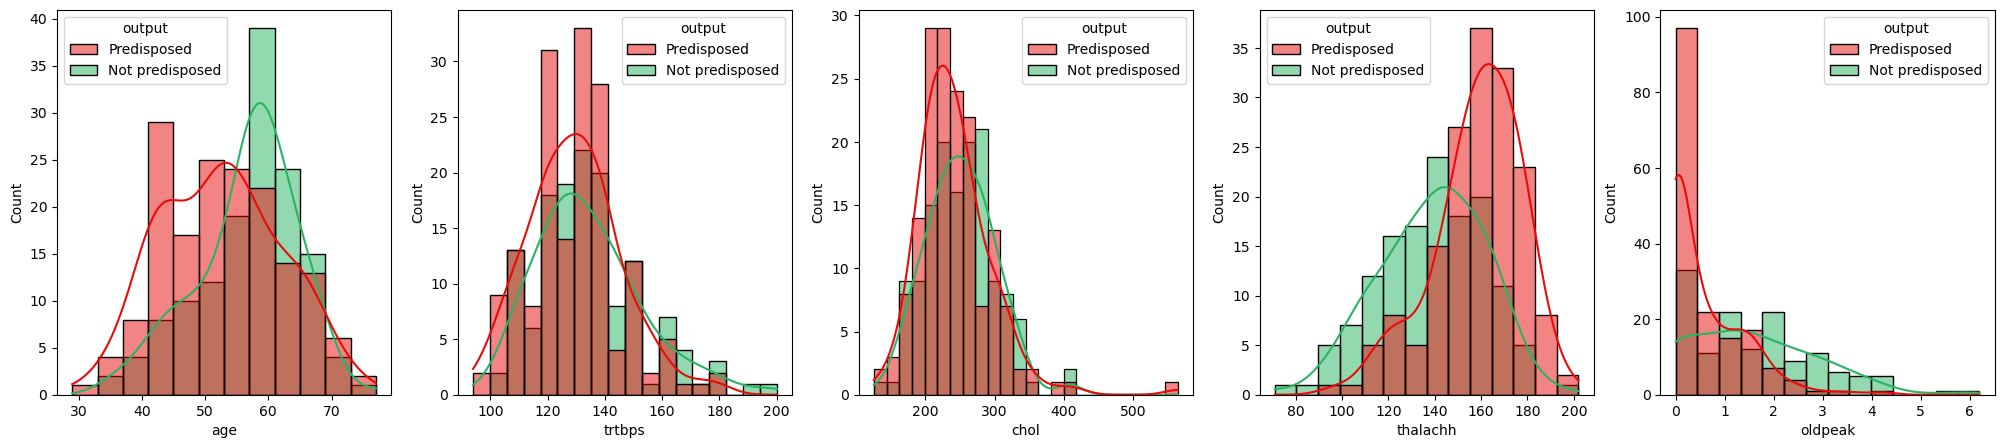

In [6]:
cont_data = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, data_column in enumerate(cont_data):
    ax = sns.histplot(data=data_viz, x=data_column, hue='output', palette = ["#E90B0B", "#28B463"], kde=True, ax=axs[i])
    
plt.show()

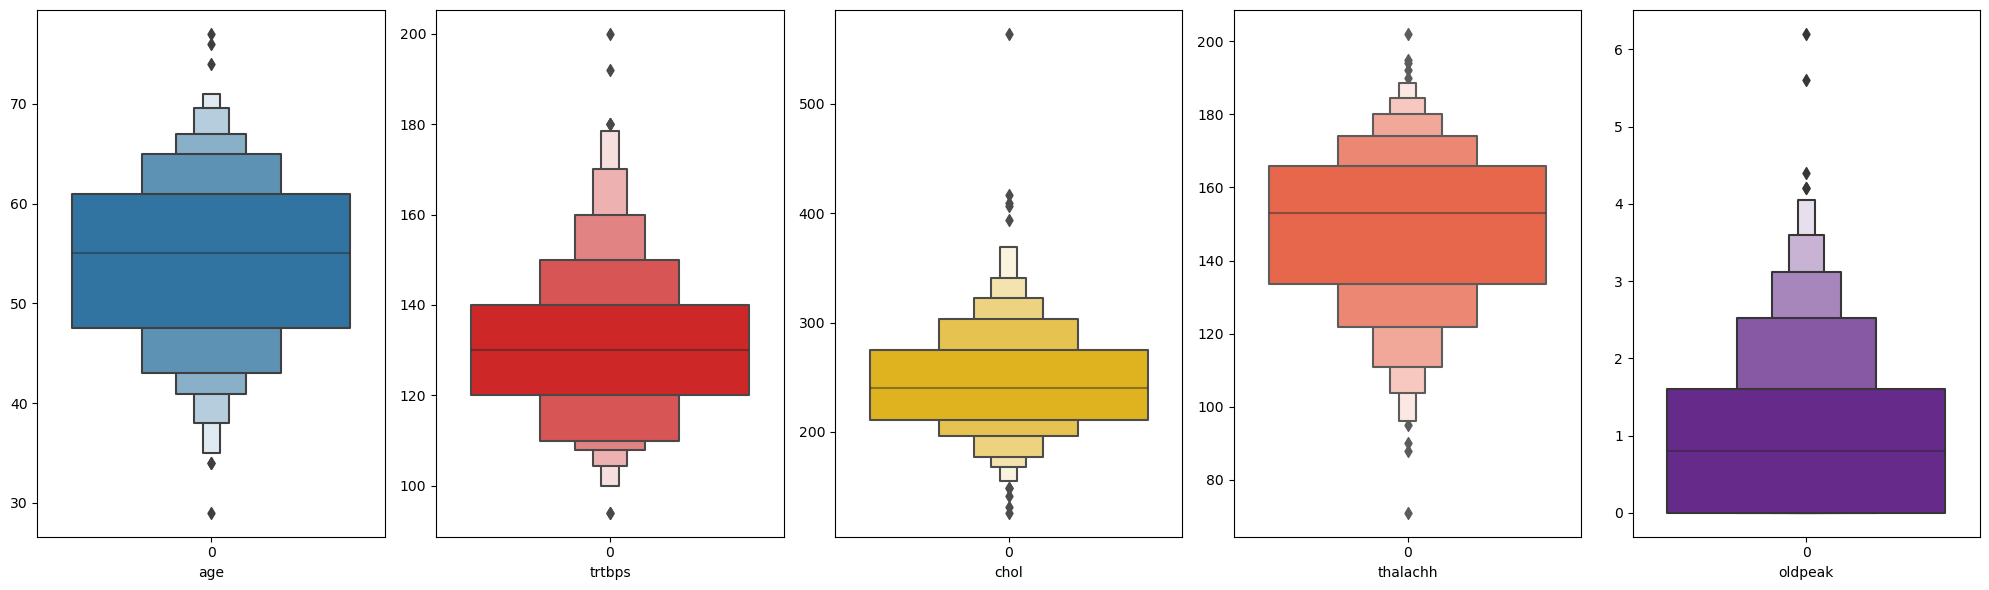

In [7]:
colors = ["#1F77B4", "#E90B0B", "#FFC300", "#FF5733", "#6A1B9A"]
fig, axs = plt.subplots(1, len(cont_data), figsize=(4 * len(cont_data), 6))


for i, feature in enumerate(cont_data):
    sns.boxenplot(data=data[feature], orient="v", color=colors[i], ax=axs[i])
    axs[i].set_xlabel(feature) 

plt.tight_layout()

plt.show()

1. The predisposed patients are mainly around 53 years old.

2. The `trtbps` feature shows that around 130 mmHg of blood pressure levels, patients may or may not be predisposed to the disease. Therefore, this graph does not provide much information.

3. Similarly, the `chol` feature shows a predisposition and non-predisposition to the disease around 250 mg/dl of cholesterol levels, which also does not provide much information.

4. The `thalachh` feature demonstrates a predisposition to the disease at around 165 beats per minute of maximum heart rate, while those without predisposition are around 145 beats per minute. A higher heart rate is associated with a higher possibility of experiencing the disease.

5. Patients who are predisposed to the disease are mainly around 0 levels of ST segment depression induced by exercise in the `oldpeak` feature. A lower level of depression indicates a higher likelihood of experiencing a heart disease.

6. As expected, all the features have outliers that we should take into account during data processing.

## Analysis of Categorical Features

Similarly, we will analyze the histograms of the categorical parameters in the database.

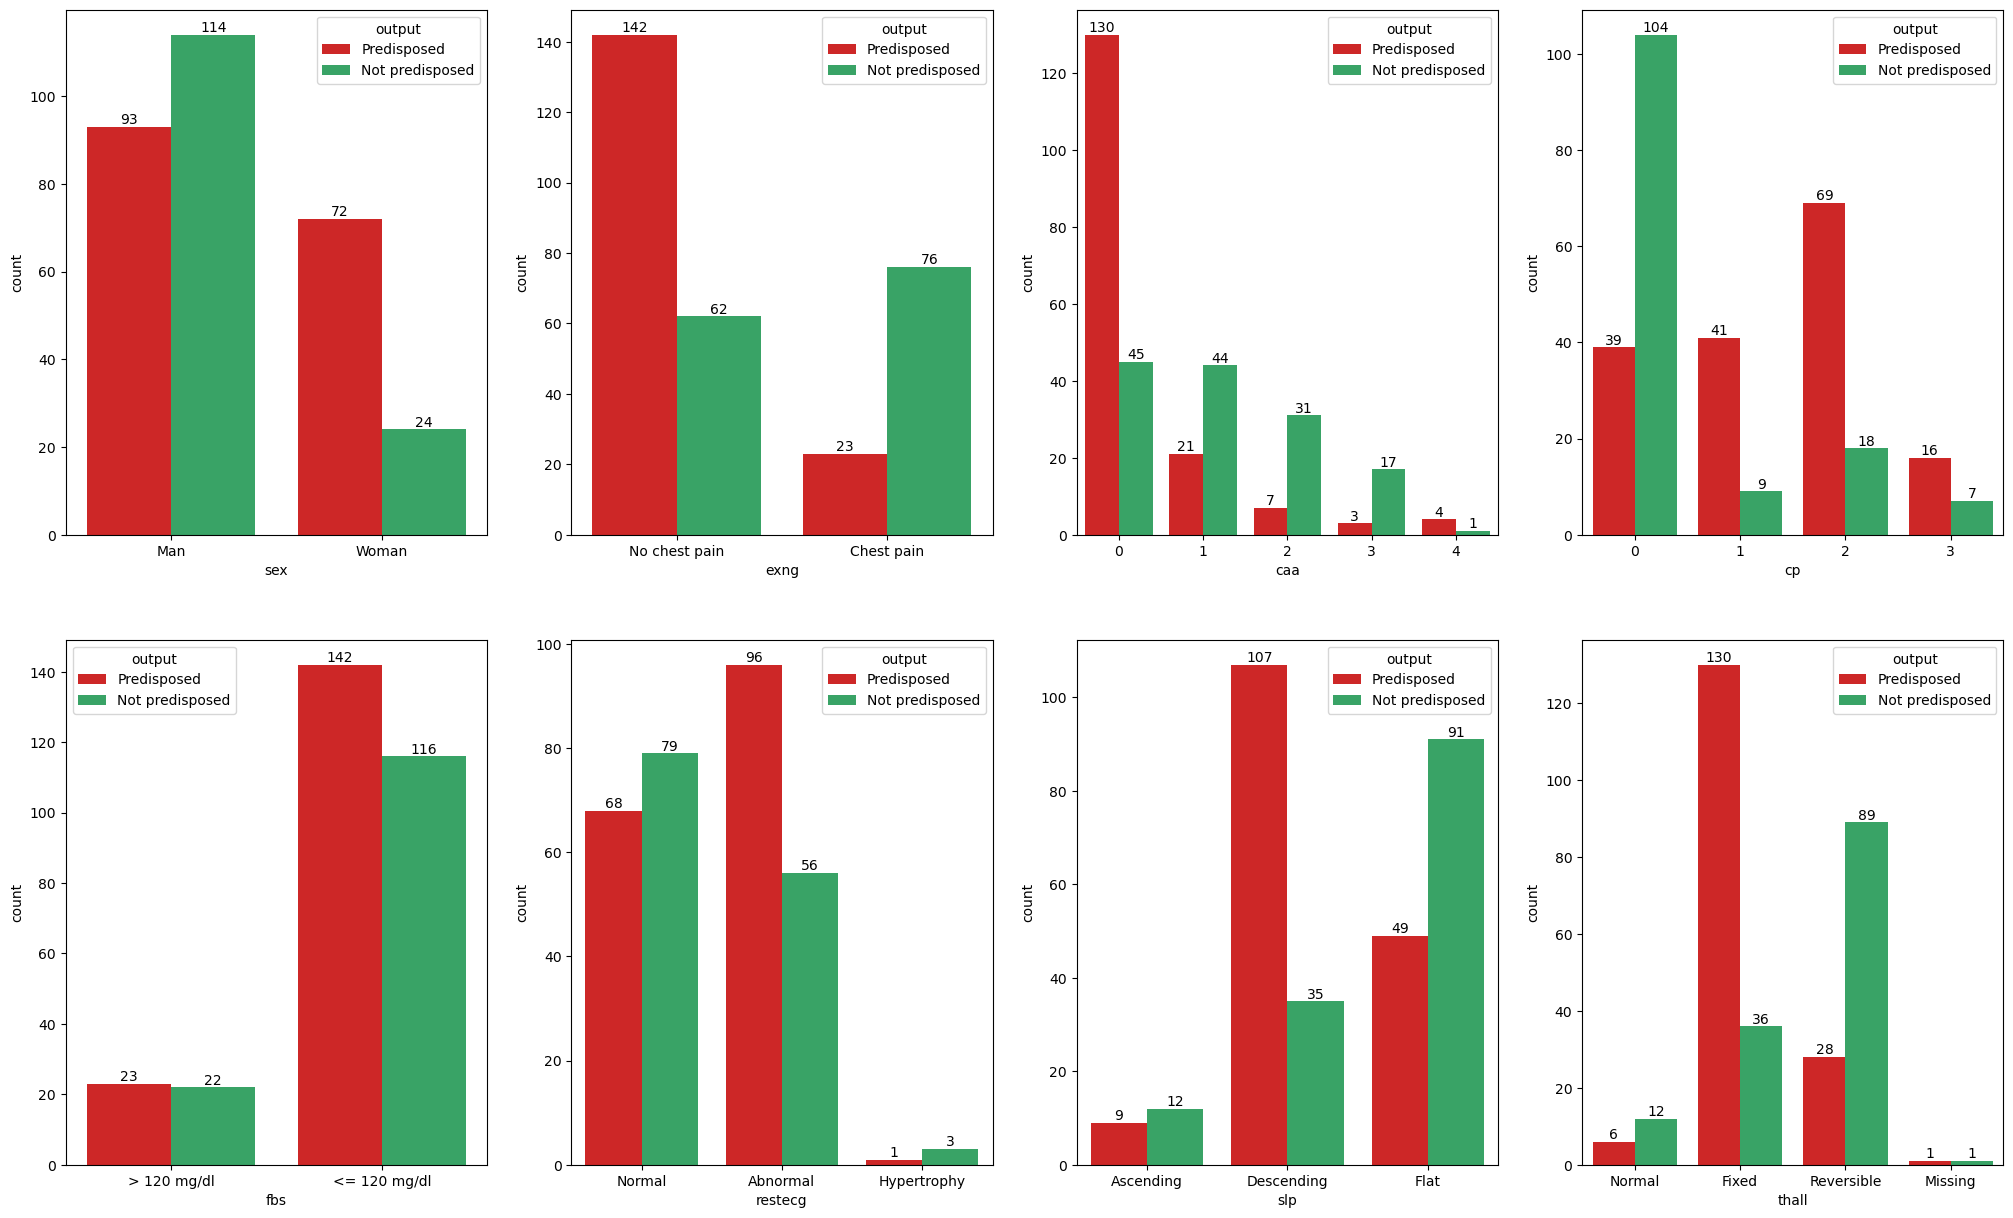

In [8]:
cat_data = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

fig, axs = plt.subplots(2, 4, figsize=(25, 15))

for i, data_column in enumerate(cat_data):
    ax = sns.countplot(data=data_viz, x=data_column, hue='output', palette=["#E90B0B", "#28B463"], ax=axs[i//4, i%4])

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

1. Male patients have a 45% predisposition to the disease, while female patients have a 75% predisposition.

2. The `exng` feature represents exercise-induced chest pain. It can be observed that 69.6% of patients without chest pain are predisposed to heart disease. On the other hand, patients with chest pain have a predisposition probability of 23.24% for heart disease.

3. In the `caa` feature, several analyses can be made:
   1. The first analysis shows that a lower number of major vessels colored by fluoroscopy indicates a higher predisposition to heart disease. This makes sense since this feature represents the number of major blood vessels that are not affected.
   2. Additionally, the database author mentioned that this value ranges from 0 to 3, and in the histogram, there are few occurrences of 4. Moreover, it shows a higher predisposition to the disease considering the number of patients. These results could be combined with another case that has the same predisposition relationship.

4. The `cp` feature indicates the type of chest pain, where a value of 0 represents typical angina. It can be observed that typical angina (0) has a predisposition to the disease of 27.28%. On the other hand, the other types of chest pain (1, 2, and 3) have a predisposition to the disease of over 70% (82%, 79.3%, and 70%).

5. The `fbs` feature represents the fasting blood sugar level, indicating if it is higher than 120 mg/dl or not. It can be observed that predisposed and non-predisposed patients have similar blood sugar levels. At first glance, this does not provide useful pattern information.

6. The `restecg` feature represents the results of an electrocardiogram, and it has 3 possible cases:
   1. The first case shows a number of patients with normal results, who have almost the same probability of being predisposed or not predisposed to heart disease.
   2. The second case shows patients with abnormal wave results. However, it can be observed that there are more patients predisposed to the disease than those who are not predisposed. Therefore, these abnormalities may not be a clear signal of predisposition to heart disease.
   3. The last case has an insufficient number of patients.

7. The `slp` feature represents the slope of the ST segment during exercise (up-sloping, flat, down-sloping). In the first case, patients with an up-sloping slope can be observed, but there are few patients with this result, and their predisposition and non-predisposition to heart disease are almost similar. Therefore, this case could be considered, similar to variable 4 in the `caa` parameter, to be combined with another case that has the same predisposition relationship. On the other hand, in the second case, there is a 75.35% probability that patients are predisposed to heart disease. In the third case, it provides more information: there is a 65% probability that patients do not predispose to heart disease.

8. Lastly, the `thall` feature represents the thallium stress test results and has 4 cases:
   1. The case has a few patients who do not predispose to the disease with normal results.
   2. The case indicates that 78.31% of patients predispose to heart disease with a fixed defect.
   3. The case indicates that 24% of patients predispose to heart disease with reversible defects.
   4. This case can be disregarded as it only contains 2 patients or combined with another case.

**NOTE: Despite the analysis being somewhat lengthy and tedious, it is of vital importance as it allows us to identify potential patterns that can be useful for data processing. Additionally, it helps us discard parameters that may not contribute significantly to categorization.**

## Correlation Analysis

We can observe the trends in the patient data collection; however, this does not clearly indicate the relationship between these characteristics and heart disease.

Therefore, we will correlate the variables with respect to the `output` variable.

In [9]:
corr_matrix = data.corr()
corr_matrix["output"].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

Additionally, we can plot the correlation between all the variables, considering the types of correlation:

<div>
    <center>
        <img src="https://cqeacademy.com/wp-content/uploads/2014/01/Scatter-Plots-Correlation-Example.jpg" alt="typecorrelation">
    </center>
</div>

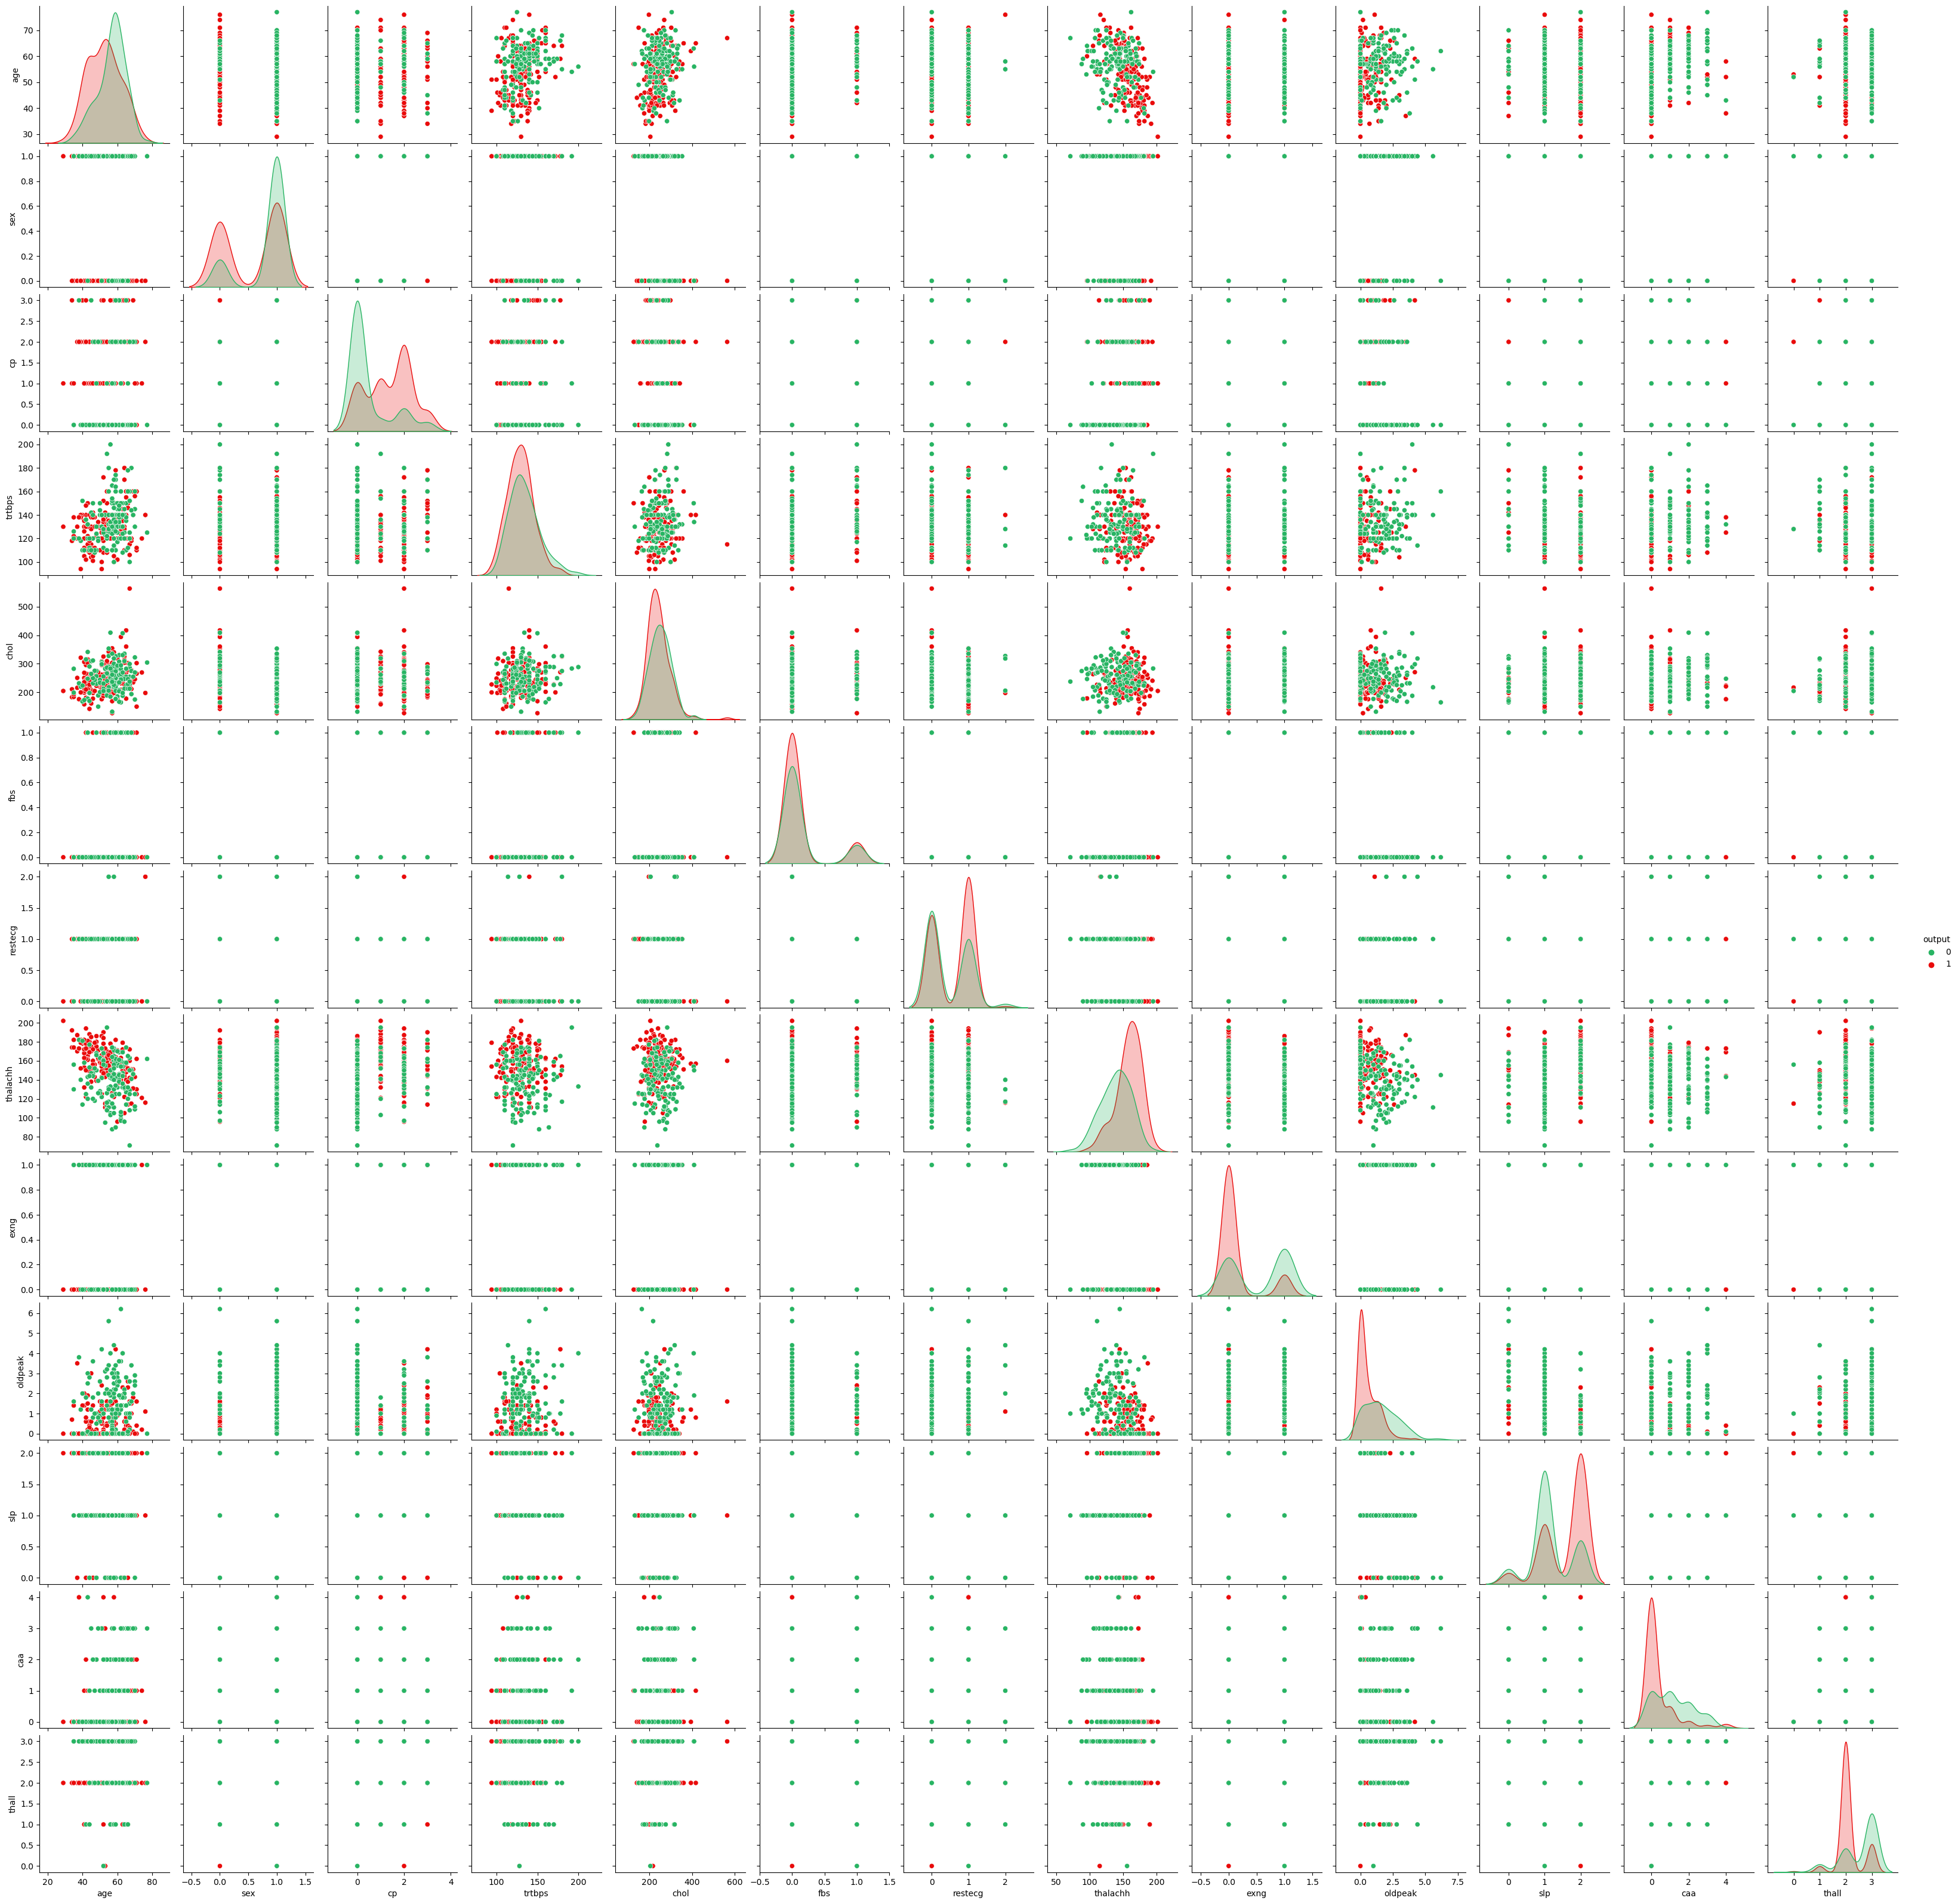

In [10]:
sns.pairplot(data=data,hue='output',palette = ["#28B463","#E90B0B"])
plt.show()

Despite these correlations not being immediately clear at first glance, we can use a heat map to visualize the degree of correlation between the variables.

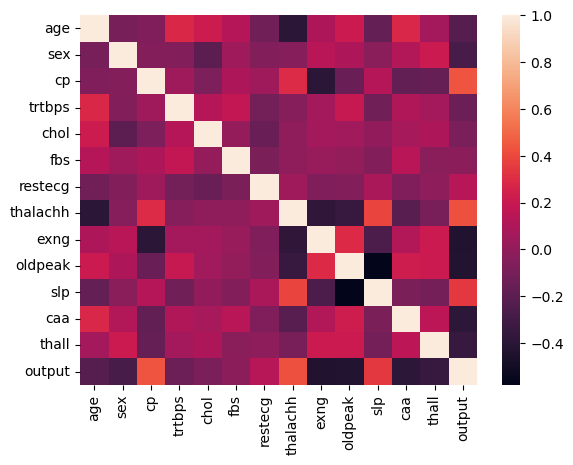

In [11]:
import seaborn as sns

sns.heatmap(corr_matrix);

With the above graph, let's explore the relationship between `slp` and `thalachh` to determine if this relationship can be useful in feature selection.

In [12]:
data["thalachh_per_slp"] = data["slp"]/data["thalachh"]
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,thalachh_per_slp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.000000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.000000
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.011628
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.011236
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.012270


In [13]:
corr_matrix = data.corr()
corr_matrix["output"].sort_values(ascending=False)

output              1.000000
cp                  0.433798
thalachh            0.421741
slp                 0.345877
thalachh_per_slp    0.220974
restecg             0.137230
fbs                -0.028046
chol               -0.085239
trtbps             -0.144931
age                -0.225439
sex                -0.280937
thall              -0.344029
caa                -0.391724
oldpeak            -0.430696
exng               -0.436757
Name: output, dtype: float64

We can observe that the correlation between the newly created feature `thalachh_per_slp` and `output` does not match that of its predecessors. Therefore, this relationship, although not useless, does not provide us with useful information.

# Data Cleaning

Based on the analysis conducted earlier, we are going to extract those features that we consider to have a lower relationship with the `output` variable.

In [14]:
data2 = data.drop(["trtbps", "chol", "fbs", "restecg", "thalachh_per_slp"], axis=1)
data2

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,1,0,3,0
299,45,1,3,132,0,1.2,1,0,3,0
300,68,1,0,141,0,3.4,1,2,3,0
301,57,1,0,115,1,1.2,1,1,3,0


Next, using the tools provided by scikit-learn (sklearn) for preprocessing, we will create a pipeline to normalize the data using the MinMaxScaler method.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cont_attribs = ["age", "thalachh", "oldpeak"]
cat_attribs = ['sex', 'exng', 'caa', 'cp', 'slp', 'thall']

cont_pipeline =  Pipeline([
    ("min_max", MinMaxScaler()),
])

cat_pipeline =  Pipeline([
    ("one_hot_encoder", OneHotEncoder()),
])

full_pipeline = ColumnTransformer([
    ("continuous", cont_pipeline, cont_attribs),
    ("categorical", cat_pipeline, cat_attribs),
])

transformed_data = full_pipeline.fit_transform(data2)

In [16]:
cont_cols = cont_attribs
cat_cols = full_pipeline.named_transformers_['categorical']['one_hot_encoder'].get_feature_names_out(cat_attribs)
all_cols = cont_cols + list(cat_cols)

In [17]:
data3 = pd.DataFrame(transformed_data, columns=all_cols)
data3['output'] = data2['output']
data3

,age,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,caa_1,caa_2,...,cp_2,cp_3,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,output
0,0.708333,0.603053,0.370968,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.166667,0.885496,0.564516,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.250000,0.770992,0.225806,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.562500,0.816794,0.129032,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.583333,0.702290,0.096774,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.396947,0.032258,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
299,0.333333,0.465649,0.193548,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
300,0.812500,0.534351,0.548387,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
301,0.583333,0.335878,0.193548,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


At the moment, regarding data cleaning, only normalization of continuous data and OneHotEncoder for categorical data are performed, as there are no missing values or categorical variables that require more extensive data treatment.

# Test Set

In this section, we will create the training and test sets. Additionally, we will perform the data split using two methods:

* Method using **train_test_split():** It is a function that randomly splits the dataset into training and test subsets. The split is done by assigning a specific proportion of the data to the test subset and the remaining to the training subset.

* Method using **StratifiedShuffleSplit():** It performs a random data split but ensures that the training and test subsets maintain the same proportion of target classes as the original dataset.

## Train_test_split method

In [18]:
from sklearn.model_selection import train_test_split

split_train_set, split_test_set = train_test_split(data3, test_size=0.2, random_state=42)

Now, let's calculate the proportion of each unique value in the `output` column for both the training and test sets.

In [19]:
print("Proportion based on the test dataset: ")
split_test_set["output"].value_counts() / len(split_test_set)

Proportion based on the test dataset: 


1    0.52459
0    0.47541
Name: output, dtype: float64

In [20]:
print("Proportion based on the training dataset: ")
split_train_set["output"].value_counts() / len(split_train_set)

Proportion based on the training dataset: 


1    0.549587
0    0.450413
Name: output, dtype: float64

Now, let's compare them with the proportion that exists between this same feature and the complete dataset.

In [21]:
print("Proportion based on the complete dataset: ")
data3["output"].value_counts() / len(data3)     

Proportion based on the complete dataset: 


1    0.544554
0    0.455446
Name: output, dtype: float64

## StratifiedShuffleSplit method

Similarly, we will perform the same process, but this time using the **StratifiedShuffleSplit()** method.

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data3, data3["output"]):
    strat_train_set = data3.loc[train_index]
    strat_test_set =  data3.loc[test_index]

In [23]:
print("Proportion based on the test dataset: ")
strat_test_set["output"].value_counts() / len(strat_test_set)

Proportion based on the test dataset: 


1    0.540984
0    0.459016
Name: output, dtype: float64

In [24]:
print("Proportion based on the training dataset: ")
strat_train_set["output"].value_counts() / len(strat_train_set)

Proportion based on the training dataset: 


1    0.545455
0    0.454545
Name: output, dtype: float64

In [25]:
print("Proportion based on the complete dataset: ")
data3["output"].value_counts() / len(data3)     

Proportion based on the complete dataset: 


1    0.544554
0    0.455446
Name: output, dtype: float64

## Method Comparison

Let's compare the results and errors between the complete dataset and the test dataset using both methods.

In [26]:
def income_cat_proportions(data, label):
    return data[label].value_counts() / len(data)

label = ["output"]

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data,label),
    "Stratified": income_cat_proportions(strat_test_set,label),
    "Random": income_cat_proportions(split_test_set,label),
}).sort_index()
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Strat. %error,Rand. %error
output,,,,,
0,0.455446,0.459016,0.47541,0.784034,4.383464
1,0.544554,0.540984,0.52459,-0.655738,-3.666170


It can be observed that the error percentages in the data split using stratified method are lower compared to the random method. This indicates that the numerical proportion is less biased in the case of stratification. Therefore, we will use the stratified method for the train-test data split.

# Model Training and Evaluation

In [27]:
data_train_set = strat_train_set.drop("output", axis=1)
train_labels = strat_train_set["output"].copy() 

data_test_set = strat_test_set.drop("output", axis=1)
test_labels = strat_test_set["output"].copy() 

For this exercise, we will implement different algorithms to classify the results. Additionally, we will analyze their accuracy percentages to determine which model classifies more accurately.

## DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(data_train_set, train_labels);

In [29]:
tree_yhat = tree_clf.predict(data_test_set)

#Model Evaluation
from sklearn.metrics import accuracy_score

tree_accuracy = accuracy_score(test_labels, tree_yhat)
print("DecisionTreeClassifier Accuracy:", tree_accuracy)

DecisionTreeClassifier Accuracy: 0.7377049180327869


We will use the **GridSearchCV()** tool for model selection, which allows us to perform multiple parameter combinations to determine which one works best. This tool uses the technique of cross-validation.

Cross-validation is widely used to obtain a more reliable evaluation of model performance and efficiently utilize available data. By performing multiple splits and averaging the results, the influence of specific training and testing sample selection is reduced, providing a more robust estimation of the overall model performance.

<div>
    <center>
        <img src="https://androidkt.com/wp-content/uploads/2021/07/Selection_103.png" alt="cross-validation">
    </center>
</div>


## RandomForestClassifier

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {"n_estimators":[50,100,110,120], "max_features":['sqrt',2,5]}, # 12
    {"bootstrap":[False], "n_estimators":[50,100,110], "max_features":['sqrt',2,5]}, # 9
]

forest_clf = RandomForestClassifier(random_state=42)

To calculate the number of combinations (X), we take into account that there are 12 options for the first parameter and 9 options for the second parameter. Additionally, we will perform a 5-fold cross-validation.

$$
X = (12 + 9) * 5
\\
X = 105
$$

Therefore, in the case of Random Forest, there will be a total of 105 training combinations.

In [31]:
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring="accuracy", return_train_score=True)

grid_search.fit(data_train_set, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': ['sqrt', 2, 5],
                          'n_estimators': [50, 100, 110, 120]},
                         {'bootstrap': [False], 'max_features': ['sqrt', 2, 5],
                          'n_estimators': [50, 100, 110]}],
             return_train_score=True, scoring='accuracy')

In [32]:
print("Best parameters of the model: ")
grid_search.best_params_

Best parameters of the model: 


{'max_features': 5, 'n_estimators': 100}

In [33]:
print("Best estimator: ")
grid_search.best_estimator_

Best estimator: 


RandomForestClassifier(max_features=5, random_state=42)

In [34]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_scores)*100,'%', params)

91.61253813129042 % {'max_features': 'sqrt', 'n_estimators': 50}
91.17058094545615 % {'max_features': 'sqrt', 'n_estimators': 100}
91.39880467817201 % {'max_features': 'sqrt', 'n_estimators': 110}
91.39880467817201 % {'max_features': 'sqrt', 'n_estimators': 120}
90.25662581440412 % {'max_features': 2, 'n_estimators': 50}
90.4871547241266 % {'max_features': 2, 'n_estimators': 100}
90.93710916413195 % {'max_features': 2, 'n_estimators': 110}
91.38950058035404 % {'max_features': 2, 'n_estimators': 120}
90.47775687867113 % {'max_features': 5, 'n_estimators': 50}
91.83966359653007 % {'max_features': 5, 'n_estimators': 100}
91.6171789731227 % {'max_features': 5, 'n_estimators': 110}
91.83966359653007 % {'max_features': 5, 'n_estimators': 120}
90.02078369242649 % {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 50}
89.79379249184227 % {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}
90.02550658971431 % {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 1

In [35]:
final_model = grid_search.best_estimator_

final_yhat = final_model.predict(data_test_set)

forest_accuracy = accuracy_score(test_labels, final_yhat)
print("RandomForestClassifier Accuracy:", forest_accuracy)

RandomForestClassifier Accuracy: 0.8524590163934426


## SVC

In [36]:
from sklearn.svm import SVC

param_grid = [
    {"kernel":['linear','poly','rbf'], "degree":[2,3,4,5]}, # 12
    {"gamma":[1,'auto'], "kernel":['linear','rbf'], "degree":[2,3,4]}, # 6
    {"C":[5,10,11,12], "kernel":['rbf'], "gamma":[1,'auto','scale']}, # 12
]

SVC_clf = SVC(random_state=42)

In [37]:
grid_search = GridSearchCV(SVC_clf, param_grid, cv=5,
                          scoring="accuracy", return_train_score=True)

grid_search.fit(data_train_set, train_labels)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'degree': [2, 3, 4, 5],
                          'kernel': ['linear', 'poly', 'rbf']},
                         {'degree': [2, 3, 4], 'gamma': [1, 'auto'],
                          'kernel': ['linear', 'rbf']},
                         {'C': [5, 10, 11, 12], 'gamma': [1, 'auto', 'scale'],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [38]:
print("Best parameters of the model: ")
grid_search.best_params_

Best parameters of the model: 


{'degree': 2, 'kernel': 'linear'}

In [39]:
print("Best estimator: ")
grid_search.best_estimator_

Best estimator: 


SVC(degree=2, kernel='linear', random_state=42)

In [40]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_scores)*100,'%', params)

92.28302369658806 % {'degree': 2, 'kernel': 'linear'}
91.62645995161716 % {'degree': 2, 'kernel': 'poly'}
92.06622874969125 % {'degree': 2, 'kernel': 'rbf'}
92.28302369658806 % {'degree': 3, 'kernel': 'linear'}
91.63573999012293 % {'degree': 3, 'kernel': 'poly'}
92.06622874969125 % {'degree': 3, 'kernel': 'rbf'}
92.28302369658806 % {'degree': 4, 'kernel': 'linear'}
91.17524428301812 % {'degree': 4, 'kernel': 'poly'}
92.06622874969125 % {'degree': 4, 'kernel': 'rbf'}
92.28302369658806 % {'degree': 5, 'kernel': 'linear'}
90.94645954297155 % {'degree': 5, 'kernel': 'poly'}
92.06622874969125 % {'degree': 5, 'kernel': 'rbf'}
92.28302369658806 % {'degree': 2, 'gamma': 1, 'kernel': 'linear'}
91.62181957988639 % {'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
92.28302369658806 % {'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
92.06622874969125 % {'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
92.28302369658806 % {'degree': 3, 'gamma': 1, 'kernel': 'linear'}
91.62181957988639 % {'degree': 3, 'gam

In [41]:
final_model = grid_search.best_estimator_

final_yhat = final_model.predict(data_test_set)

SVC_accuracy = accuracy_score(test_labels, final_yhat)
print("SVC Accuracy:", SVC_accuracy)

SVC Accuracy: 0.8360655737704918


## KNeighborsClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {"n_neighbors":[2,3,4,5], "algorithm":['auto', 'ball_tree', 'kd_tree']}, # 12
    {"n_neighbors":[2,3,4,5], "weights":['uniform', 'distance']}, # 6
    {"n_neighbors":[3,4,5], "weights":['uniform', 'distance'], "algorithm":['ball_tree', 'kd_tree']}, # 6
]

KNN_clf = KNeighborsClassifier()

In [43]:
grid_search = GridSearchCV(KNN_clf, param_grid, cv=5,
                          scoring="accuracy", return_train_score=True)

grid_search.fit(data_train_set, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                          'n_neighbors': [2, 3, 4, 5]},
                         {'n_neighbors': [2, 3, 4, 5],
                          'weights': ['uniform', 'distance']},
                         {'algorithm': ['ball_tree', 'kd_tree'],
                          'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [44]:
print("Best parameters of the model: ")
grid_search.best_params_

Best parameters of the model: 


{'algorithm': 'auto', 'n_neighbors': 5}

In [45]:
print("Best estimator: ")
grid_search.best_estimator_

Best estimator: 


KNeighborsClassifier()

In [46]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_scores)*100,'%', params)

89.77485065163745 % {'algorithm': 'auto', 'n_neighbors': 2}
91.84429296183765 % {'algorithm': 'auto', 'n_neighbors': 3}
91.38484817621834 % {'algorithm': 'auto', 'n_neighbors': 4}
92.29684438263963 % {'algorithm': 'auto', 'n_neighbors': 5}
89.77485065163745 % {'algorithm': 'ball_tree', 'n_neighbors': 2}
91.84429296183765 % {'algorithm': 'ball_tree', 'n_neighbors': 3}
91.38484817621834 % {'algorithm': 'ball_tree', 'n_neighbors': 4}
92.29684438263963 % {'algorithm': 'ball_tree', 'n_neighbors': 5}
89.77485065163745 % {'algorithm': 'kd_tree', 'n_neighbors': 2}
91.84429296183765 % {'algorithm': 'kd_tree', 'n_neighbors': 3}
91.38484817621834 % {'algorithm': 'kd_tree', 'n_neighbors': 4}
92.29684438263963 % {'algorithm': 'kd_tree', 'n_neighbors': 5}
89.77485065163745 % {'n_neighbors': 2, 'weights': 'uniform'}
90.71709781918013 % {'n_neighbors': 2, 'weights': 'distance'}
91.84429296183765 % {'n_neighbors': 3, 'weights': 'uniform'}
91.39880467817201 % {'n_neighbors': 3, 'weights': 'distance'}
91

In [47]:
final_model = grid_search.best_estimator_

final_yhat = final_model.predict(data_test_set)

KNN_accuracy = accuracy_score(test_labels, final_yhat)
print("KNeighborsClassifier Accuracy:", KNN_accuracy)

KNeighborsClassifier Accuracy: 0.819672131147541


# Analysis-and-results

With the different implemented methods, we will now analyze which one had the highest accuracy.

In [48]:
accuracies = {'Decision Tree': tree_accuracy, 'Random Forest': forest_accuracy, 'SVC': SVC_accuracy, 'KNN': KNN_accuracy}

df = pd.DataFrame(list(accuracies.items()), columns=['Method', 'Accuracy'])

df_styled = df.style\
    .applymap(lambda x: 'background-color: #28B463', subset=['Accuracy'])\
    .applymap(lambda x: 'font-weight: bold', subset=['Accuracy'])

df_styled

,Method,Accuracy
0,Decision Tree,0.737705
1,Random Forest,0.852459
2,SVC,0.836066
3,KNN,0.819672
